# Pandas 시각화
판다시 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [2]:
import pandas as pd

tips = pd.read_csv('data/tips.csv')
tips.shape

(244, 7)

<AxesSubplot:>

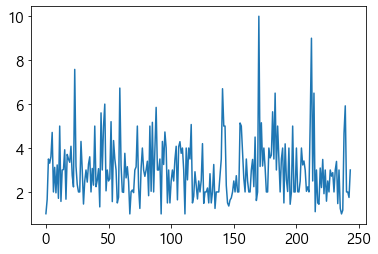

In [3]:
tips['tip'].plot.line()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- kind : 그래프 종류 지정
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot

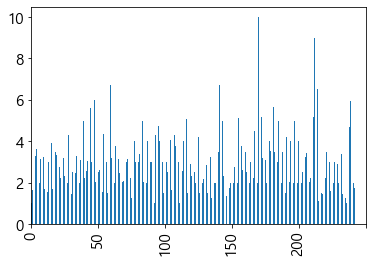

In [19]:
tips['tip'].plot.bar()
plt.xticks([0,50,100,150,200,250])
plt.show()

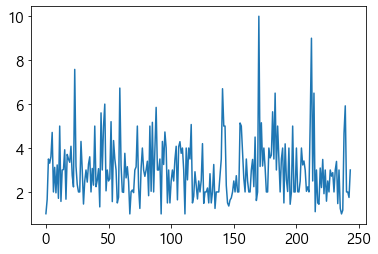

In [9]:
tips['tip'].plot(kind='line')
plt.show()

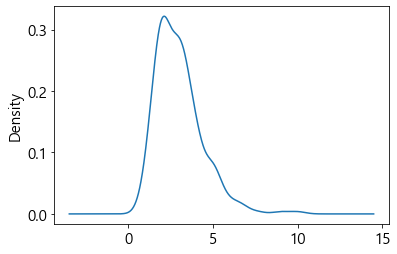

In [12]:
tips['tip'].plot(kind='kde')
plt.show()

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다.

In [24]:

a = tips['sex'].value_counts()
a

Male      157
Female     87
Name: sex, dtype: int64

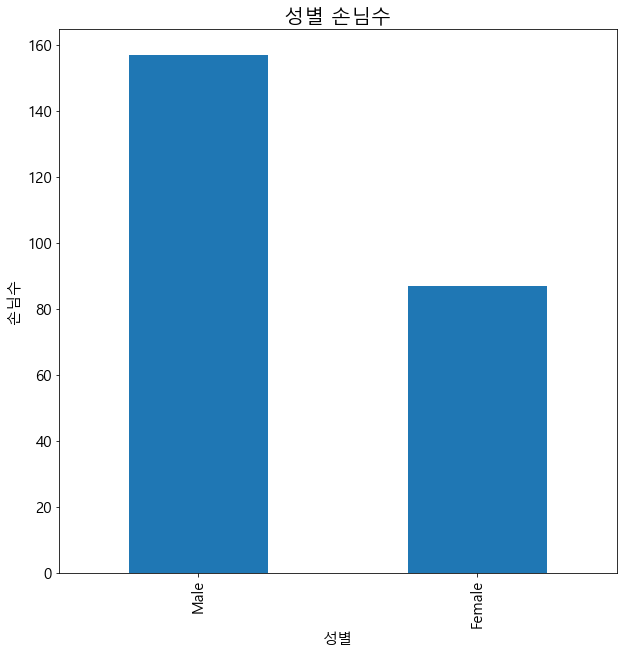

In [41]:
#성별: 남성, 여성의 수
#plt.figure(figsize=(10,10))
a.plot(kind='bar', figsize=(10,10))# title='title')
# Series.bar(): index가 x축, value가 y축
plt.title("성별 손님수")
plt.ylabel('손님수')
plt.xlabel('성별')
plt.show()

<BarContainer object of 2 artists>

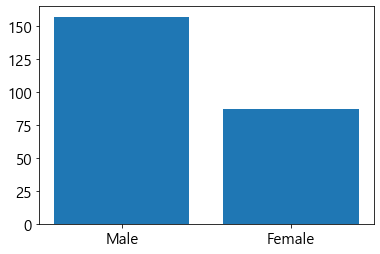

In [30]:
plt.bar(a.index, a)

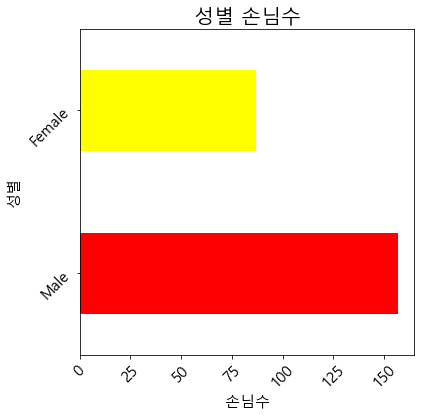

In [61]:
#성별: 남성, 여성의 수
#plt.figure(figsize=(10,10))
a.plot(kind='barh', figsize=(6,6),color=['r','yellow'],rot=45)# title='title')
# Series.bar(): index가 x축, value가 y축
plt.title("성별 손님수")
plt.xticks(rotation=45)
plt.xlabel('손님수')
plt.ylabel('성별')
plt.show()

In [46]:
sm = tips['smoker'].value_counts()
sm

No     151
Yes     93
Name: smoker, dtype: int64

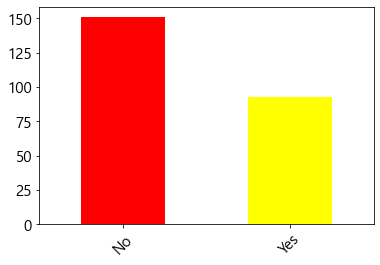

In [58]:
sm.plot.bar(color=['r','yellow'],rot=45)
plt.show()

In [75]:
agg_df = tips.pivot_table(index='smoker', columns='sex', values='tip', aggfunc='count')
agg_df

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


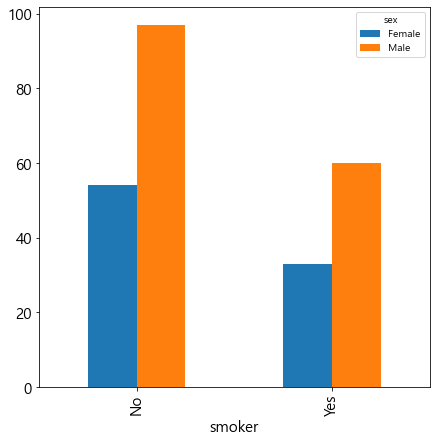

In [71]:
agg_df.plot.bar(figsize=(7,7))
plt.show()

In [76]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [81]:
# 요일(day)-성별(sex) 손님의 총수(size)
# df의 index : ticks- 1차 그룹, columns- 각 ticks마다 나눠져서 나옴. - 2차 그룹.
df = tips.pivot_table(index='day', columns='sex', values='size', aggfunc='sum')
df

sex,Female,Male
day,,
Fri,19,21
Sat,63,156
Sun,53,163
Thur,79,73


<AxesSubplot:xlabel='day'>

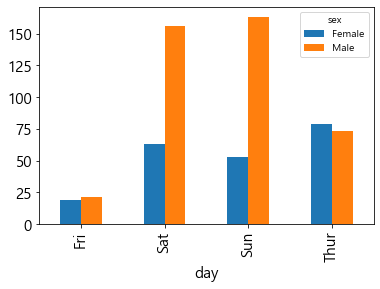

In [124]:
tips.pivot_table(index='day', columns='sex', values='size', aggfunc='sum').plot.bar()

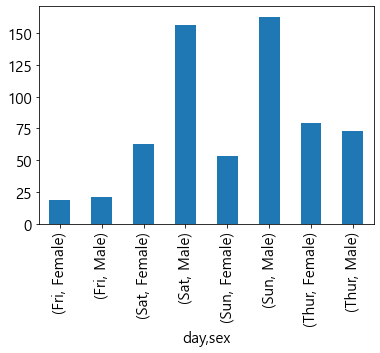

In [128]:
tips.groupby(['day','sex'])['size'].sum().plot.bar()
plt.show()

<AxesSubplot:xlabel='day'>

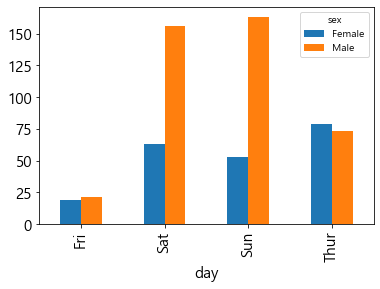

In [80]:
df.plot(kind='bar')

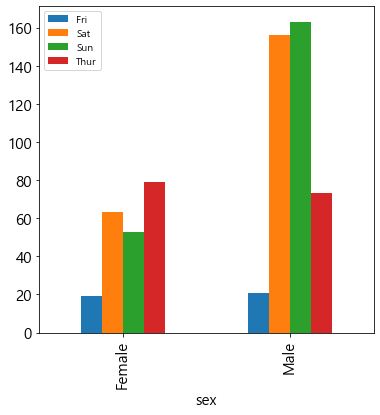

In [85]:
tips.pivot_table(index='sex', columns='day', values='size', aggfunc='sum').plot.bar(figsize=(6,6))
plt.legend(loc='upper left')
plt.show()

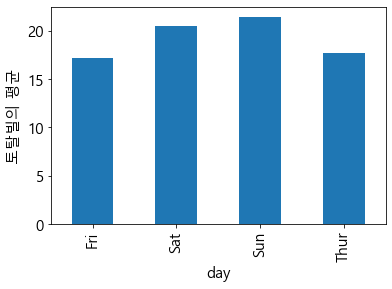

In [90]:
tips.groupby(['day'])['total_bill'].mean().plot.bar()
plt.ylabel('토탈빌의 평균')
plt.show()

<AxesSubplot:xlabel='day,sex'>

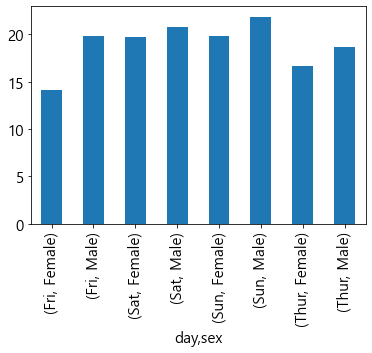

In [92]:
tips.groupby(['day','sex'])['total_bill'].mean().plot.bar()

In [93]:
tips.groupby(['day'])['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

In [94]:
tips.groupby(['day','sex'])['total_bill'].mean()

day   sex   
Fri   Female    14.145556
      Male      19.857000
Sat   Female    19.680357
      Male      20.802542
Sun   Female    19.872222
      Male      21.887241
Thur  Female    16.715312
      Male      18.714667
Name: total_bill, dtype: float64

<AxesSubplot:xlabel='day'>

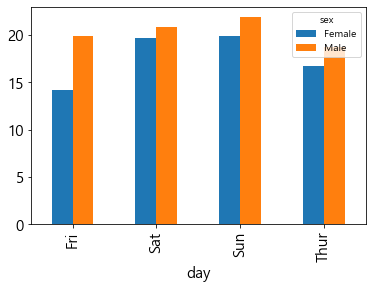

In [99]:
tips.pivot_table(index='day', columns='sex', values='total_bill', aggfunc='mean').plot.bar()

- 두개의 분류 별로 그리기
    - 여러개의 컬럼일 경우 수평 누적 막대그래프를 그린다.


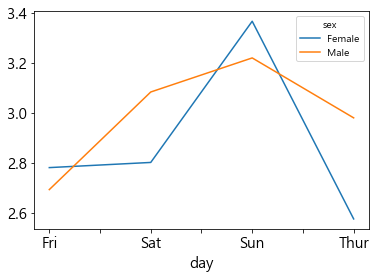

In [118]:
tips.pivot_table(index='day', columns='sex', values='tip', aggfunc='mean').plot.line()
#plt.yticks(range(0,4,1))
plt.show()

## 파이차트

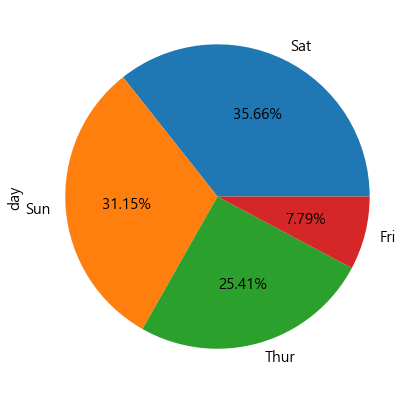

In [110]:
tips['day'].value_counts().plot.pie(figsize=(7,7), autopct="%.2f%%", fontsize=15);

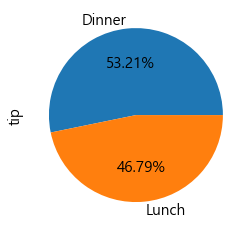

In [111]:
tips.groupby('time')['tip'].mean().plot(kind='pie',autopct='%.2f%%', fontsize=15);

## 히스토그램, KDE(밀도그래프)

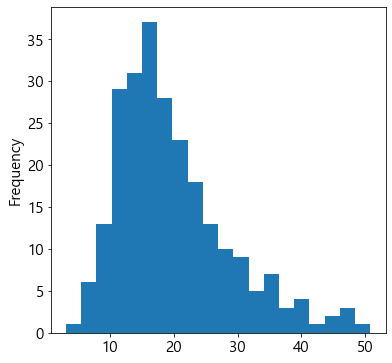

In [121]:
#tips['total_bill'].plot.hist(figsize=(6,6),bins=20)
tips['total_bill'].plot(kind='hist', figsize=(6,6),bins=20)
plt.show()

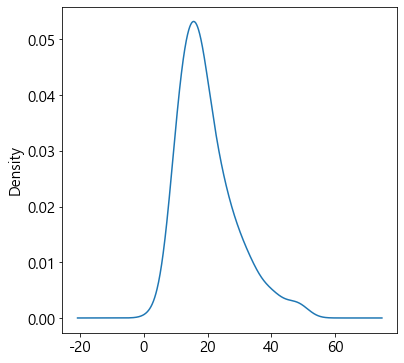

In [123]:
#tips['total_bill'].plot.kde(figsize=(6,6))
tips['total_bill'].plot(kind='kde', figsize=(6,6))
plt.show()

## Boxplot (상자그래프)

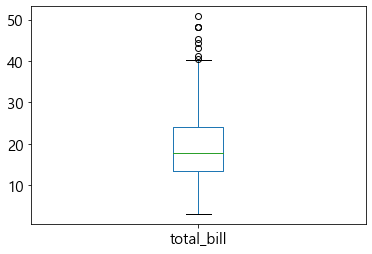

In [130]:
# Series
tips['total_bill'].plot.box()#whis=3)
plt.show()

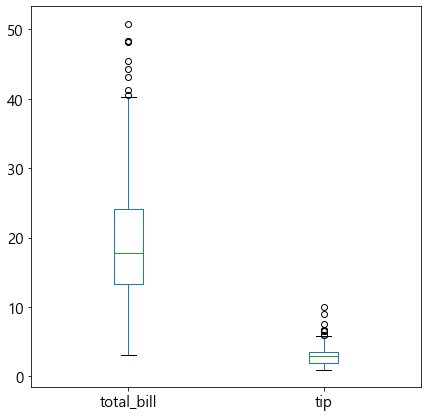

In [132]:
tips[['total_bill','tip']].plot(kind='box', figsize=(7,7))
plt.show()

<AxesSubplot:>

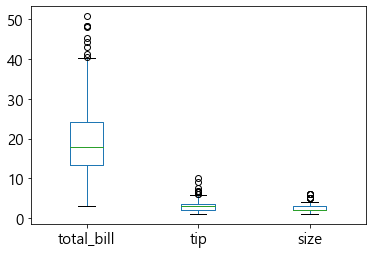

In [135]:
tips.plot(kind='box')

<AxesSubplot:>

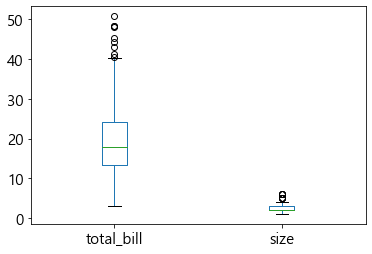

In [137]:
tips[['total_bill','size']].plot(kind='box')

## scatter plot (산점도) 
- DataFrame을 이용해서만 그린다.


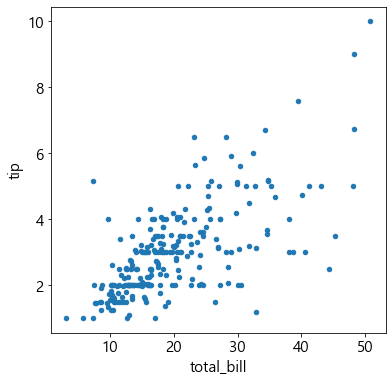

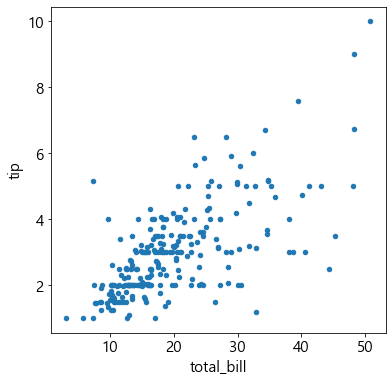

In [144]:
tips.plot(kind='scatter',x='total_bill', y= 'tip', figsize=(6,6)) # x에 올 컬럼명, y에 올 컬럼명.
tips.plot.scatter(x='total_bill', y= 'tip', figsize=(6,6))
plt.show()

In [143]:
tips[['total_bill','tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


# 파이썬의 날짜/시간 다루기
- datetime 모듈
    - datetime 클래스 - 날짜 / 시간
    - date: 날짜
    - time: 시간

In [145]:
import datetime # module import

In [152]:
datetime.datetime?

In [155]:
c = datetime.datetime.now() # 현재(실행시점)일시를 datetime객체로 반환
c

datetime.datetime(2021, 3, 11, 17, 8, 13, 708478)

In [157]:
# 특정일시
date = datetime.datetime(2004,4,5)
date

datetime.datetime(2004, 4, 5, 0, 0)

In [158]:
# 특정일시
date2 = datetime.datetime(2004,5,20,15,32,5)
date2

datetime.datetime(2004, 5, 20, 15, 32, 5)

In [160]:
print(date2.year, date2.month, date2.day, date2.hour, date.minute, date2.second)# 년도, 월, 일

2004 5 20 15 0 5


In [163]:
date3 = datetime.datetime.now()

In [167]:
print('요일:', date3.weekday()) # 월:0, 일:6

요일: 3


In [166]:
date3.isocalendar() # 년도,몇주차, 요일) # 월:1, 일:7

(2021, 10, 4)

In [172]:
# datetime -> 문자열
# datetime.strftime("format문자열")
# '%Y: 4자리 년도, /%m: 월, /%d: 일, %H: 시간(24시), :%M: 분, :%S: 초 %A: 요일
date3.strftime('%Y/%m/%d %H:%M:%S %A')

'2021/03/11 17:17:05 Thursday'

In [177]:
# 문자열 -> datetime
# strptime
d = datetime.datetime.strptime("2020/10/20","%Y/%m/%d")
d, d.day

(datetime.datetime(2020, 10, 20, 0, 0), 20)

# 판다스에서 datetime 사용

In [180]:
d = [datetime.datetime.now()]*10
df = pd.DataFrame({
    "age":np.random.randint(10,100,10),
    "day":d
})
df.shape

(10, 2)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   age     10 non-null     int32         
 1   day     10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int32(1)
memory usage: 248.0 bytes


dt accessor: datatime 타입의 값드을 처리하는 기능을 제공

In [185]:
# Series 타입: datetime 64
df['day'].dt.year # 원소별로 날짜/시간에서 원하는 항목들을 추출

0    2021
1    2021
2    2021
3    2021
4    2021
5    2021
6    2021
7    2021
8    2021
9    2021
Name: day, dtype: int64

In [188]:
df['day'].dt.month

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: day, dtype: int64

In [ ]:
# day: 일, hour: 시간, minute:분, second:초
# week: 주
# dayofweek: 요일(0:월 6:일)
# dayofyear
# isocalendar() - (년,주차,요일) 1:월, 7:일

In [189]:
df['day'].dt.day, df['day'].dt.hour, df['day'].dt.minute, df['day'].dt.second

(0    11
 1    11
 2    11
 3    11
 4    11
 5    11
 6    11
 7    11
 8    11
 9    11
 Name: day, dtype: int64,
 0    17
 1    17
 2    17
 3    17
 4    17
 5    17
 6    17
 7    17
 8    17
 9    17
 Name: day, dtype: int64,
 0    28
 1    28
 2    28
 3    28
 4    28
 5    28
 6    28
 7    28
 8    28
 9    28
 Name: day, dtype: int64,
 0    10
 1    10
 2    10
 3    10
 4    10
 5    10
 6    10
 7    10
 8    10
 9    10
 Name: day, dtype: int64)

In [190]:
df['day'].dt.isocalendar()

,year,week,day
0,2021,10,4
1,2021,10,4
2,2021,10,4
3,2021,10,4
4,2021,10,4
5,2021,10,4
6,2021,10,4
7,2021,10,4
8,2021,10,4
9,2021,10,4


In [191]:
df['day'].dt.dayofyear

0    70
1    70
2    70
3    70
4    70
5    70
6    70
7    70
8    70
9    70
Name: day, dtype: int64

In [195]:
df['월'] = df['day'].dt.month

In [198]:
df['day'].dt.dayofweek

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: day, dtype: int64

In [200]:
df['요일']= df['day'].dt.dayofweek
df

,age,day,월,요일
0,94,2021-03-11 17:28:10.882381,3,3
1,15,2021-03-11 17:28:10.882381,3,3
2,60,2021-03-11 17:28:10.882381,3,3
3,76,2021-03-11 17:28:10.882381,3,3
4,95,2021-03-11 17:28:10.882381,3,3
5,37,2021-03-11 17:28:10.882381,3,3
6,28,2021-03-11 17:28:10.882381,3,3
7,89,2021-03-11 17:28:10.882381,3,3
8,31,2021-03-11 17:28:10.882381,3,3
9,21,2021-03-11 17:28:10.882381,3,3


In [197]:
df.groupby('월')['age'].mean()

월
3    54.6
Name: age, dtype: float64

In [202]:
 = pd.concat([df,df['day'].dt.isocalendar()], axis=1)

In [203]:
ab

,age,day,월,요일,year,week,day
0,94,2021-03-11 17:28:10.882381,3,3,2021,10,4
1,15,2021-03-11 17:28:10.882381,3,3,2021,10,4
2,60,2021-03-11 17:28:10.882381,3,3,2021,10,4
3,76,2021-03-11 17:28:10.882381,3,3,2021,10,4
4,95,2021-03-11 17:28:10.882381,3,3,2021,10,4
5,37,2021-03-11 17:28:10.882381,3,3,2021,10,4
6,28,2021-03-11 17:28:10.882381,3,3,2021,10,4
7,89,2021-03-11 17:28:10.882381,3,3,2021,10,4
8,31,2021-03-11 17:28:10.882381,3,3,2021,10,4
9,21,2021-03-11 17:28:10.882381,3,3,2021,10,4


In [205]:
ac = pd.concat([df,df['day'].dt.isocalendar()])
ac

,age,day,월,요일,year,week
0,94.0,2021-03-11 17:28:10.882381,3.0,3.0,<NA>,<NA>
1,15.0,2021-03-11 17:28:10.882381,3.0,3.0,<NA>,<NA>
2,60.0,2021-03-11 17:28:10.882381,3.0,3.0,<NA>,<NA>
3,76.0,2021-03-11 17:28:10.882381,3.0,3.0,<NA>,<NA>
4,95.0,2021-03-11 17:28:10.882381,3.0,3.0,<NA>,<NA>
5,37.0,2021-03-11 17:28:10.882381,3.0,3.0,<NA>,<NA>
6,28.0,2021-03-11 17:28:10.882381,3.0,3.0,<NA>,<NA>
7,89.0,2021-03-11 17:28:10.882381,3.0,3.0,<NA>,<NA>
8,31.0,2021-03-11 17:28:10.882381,3.0,3.0,<NA>,<NA>
9,21.0,2021-03-11 17:28:10.882381,3.0,3.0,<NA>,<NA>


In [206]:
df2 = df.set_index('day')
df2

,age,월,요일
day,,,
2021-03-11 17:28:10.882381,94,3,3
2021-03-11 17:28:10.882381,15,3,3
2021-03-11 17:28:10.882381,60,3,3
2021-03-11 17:28:10.882381,76,3,3
2021-03-11 17:28:10.882381,95,3,3
2021-03-11 17:28:10.882381,37,3,3
2021-03-11 17:28:10.882381,28,3,3
2021-03-11 17:28:10.882381,89,3,3
2021-03-11 17:28:10.882381,31,3,3


In [207]:
# datetime 타입의 index를 생성
# pd.date_range(시작날짜, freq='변화규칙', periods='개수') # 규칙적으로 증가/감소 하는 datetime값을 가지는 index를 생성

In [213]:
pd.date_range('2000/1/1', freq='M', periods=5) # 2000/1/1 부터 1개월씩 증가하는 날짜 5개 생성. 기준이 마지막날

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31'],
              dtype='datetime64[ns]', freq='M')

In [212]:
pd.date_range('2000/1/1', freq='MS', periods=5) #기준이 첫번째날

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [214]:
pd.date_range('2000/1/1', freq='Y', periods=5) #그해의 마지막날짜

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [215]:
pd.date_range('2000/1/1', freq='YS', periods=5) #그해의 첫번째날짜

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [ ]:
# freq - 간격을 지정(Y:YEAR, M:MONTH, D: DAY, H:HOUR, T:MINUTE, S: SECOND)
# Y, M, H, T, S: 처음날짜
# YS, MS, HS, TS, SS: 마지막날짜
# 문자앞에 정수: 간격

In [216]:
pd.date_range('2000/1/1', freq='D', periods=5)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')

In [219]:
pd.date_range('2000/1/1', freq='Y', periods=5)

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [220]:
pd.date_range('2000/1/1', freq='5Y', periods=5)

DatetimeIndex(['2000-12-31', '2005-12-31', '2010-12-31', '2015-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='5A-DEC')

In [218]:
pd.date_range('2000/1/1', freq='5D', periods=5)
pd.date_range('2000/1/1', freq='-5D', periods=5)

DatetimeIndex(['2000-01-01', '1999-12-27', '1999-12-22', '1999-12-17',
               '1999-12-12'],
              dtype='datetime64[ns]', freq='-5D')

In [186]:
def a(d):
    return d.year

In [187]:
df['day'].apply(a)

0    2021
1    2021
2    2021
3    2021
4    2021
5    2021
6    2021
7    2021
8    2021
9    2021
Name: day, dtype: int64

In [183]:
df

,age,day
0,94,2021-03-11 17:28:10.882381
1,15,2021-03-11 17:28:10.882381
2,60,2021-03-11 17:28:10.882381
3,76,2021-03-11 17:28:10.882381
4,95,2021-03-11 17:28:10.882381
5,37,2021-03-11 17:28:10.882381
6,28,2021-03-11 17:28:10.882381
7,89,2021-03-11 17:28:10.882381
8,31,2021-03-11 17:28:10.882381
9,21,2021-03-11 17:28:10.882381


In [223]:
pd.__version__

'1.1.3'

In [ ]:
!pip install pandas --upgrade

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
value = np.round(np.random.normal(5,3, size=(10,3)),2)
index = pd.date_range('2020/1/1', freq='M', periods=10)
df = pd.DataFrame(value, index=index, columns=['no1', 'no2', 'no3'])
df

,no1,no2,no3
2020-01-31,11.59,4.60,-5.45
2020-02-29,1.14,4.60,4.00
2020-03-31,3.64,5.83,4.70
2020-04-30,3.04,1.88,2.21
2020-05-31,6.10,11.32,7.80
2020-06-30,12.58,3.76,6.44
2020-07-31,5.84,5.13,5.87
2020-08-31,4.03,3.43,8.26
2020-09-30,2.35,6.18,0.58
2020-10-31,9.05,3.68,4.17


# line plot

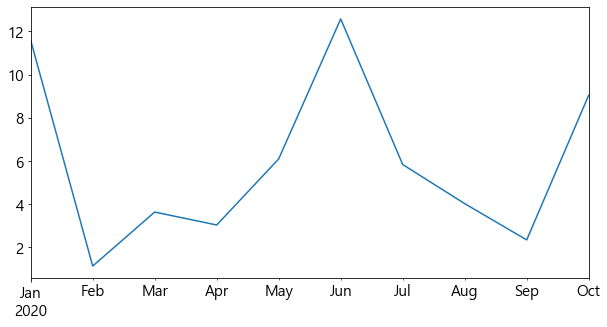

In [4]:
#Series : X-index, Y: value
# df['no1'].plot(kind='line', figsize=(10,5))
df['no1'].plot(figsize=(10,5)) #kind의 default='line'이므로 생략가능.
plt.show()

<AxesSubplot:>

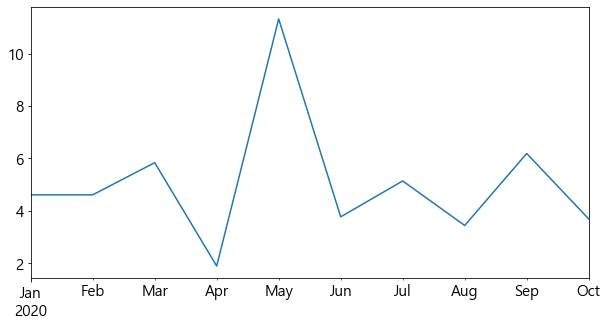

In [5]:
df['no2'].plot.line(figsize=(10,5))

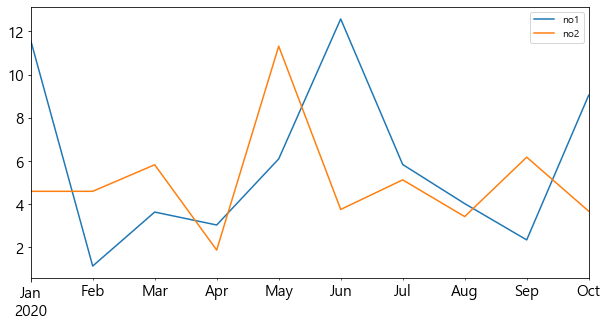

In [6]:
# DataFrame: X-index, Y-숫자형 컬럼들 - 컬럼별로 선그래프를 각각 그려준다.
df[['no1', 'no2']].plot(figsize=(10,5))
plt.show()

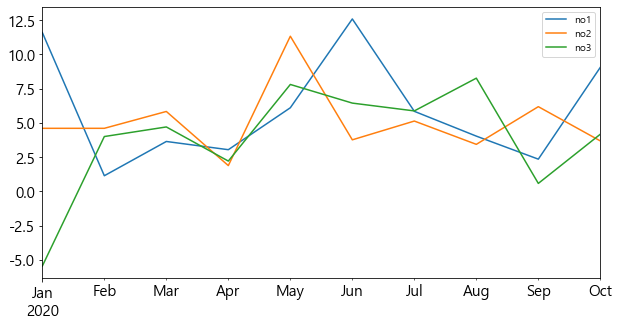

In [11]:
df[['no1', 'no2','no3']].plot(figsize=(10,5))
plt.show()

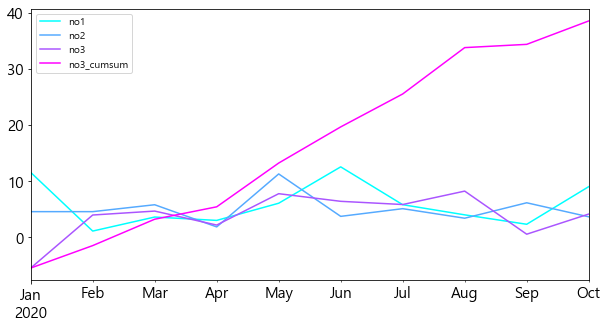

In [28]:
df.plot(figsize=(10,5), cmap='cool')
plt.show()

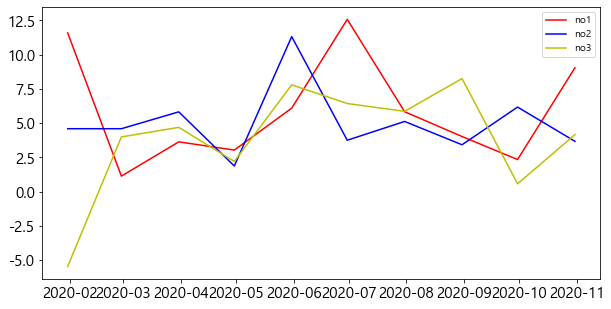

In [26]:
plt.figure(figsize=(10,5))
plt.plot(df['no1'], label='no1', color='r')
plt.plot(df['no2'], label='no2', color='b')
plt.plot(df['no3'], label='no3', color='y')
plt.legend()
plt.show()

In [9]:
df['no3_cumsum'] = df['no3'].cumsum() #누적합계
d


,no1,no2,no3,no3_cumsum
2020-01-31,11.59,4.60,-5.45,-5.45
2020-02-29,1.14,4.60,4.00,-1.45
2020-03-31,3.64,5.83,4.70,3.25
2020-04-30,3.04,1.88,2.21,5.46
2020-05-31,6.10,11.32,7.80,13.26
2020-06-30,12.58,3.76,6.44,19.70
2020-07-31,5.84,5.13,5.87,25.57
2020-08-31,4.03,3.43,8.26,33.83
2020-09-30,2.35,6.18,0.58,34.41
2020-10-31,9.05,3.68,4.17,38.58


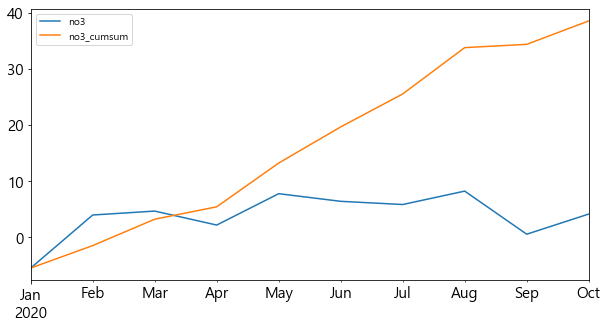

In [10]:
df[['no3', 'no3_cumsum']].plot(figsize=(10,5))
plt.show()

In [41]:
pd.groupby(df,index)

AttributeError: module 'pandas' has no attribute 'groupby'